# Group 70: Project Proposal
## Predicting Cancer Mortality Rates Through Varying Demographic Data

### Introduction
Cancer is one of the leading causes of death in the developed world. Therefore, it is crucial that we investigate the links between cancer mortality rates and demographic data. Using a dataset imported from data.world that aggregates data from the American Community Survey, clinicaltrails.gov (a public clinical trial database), and the National Cancer Institute, we hope to predict the cancer mortality rate of a county using demographic data. Our question is the following: if given the median age and income of a county in the United States, what will be the cancer mortality rate of that county? Our claim is that a county with a higher median age and lower median income will lead to higher cancer mortality rates.

### Loading libraries

In [79]:
library(tidyverse) # to perform operations on the data set
library(repr) # to set graph plot size and performing some operations on data set
library(tidymodels)

### Reading data from URL

In [80]:
# Reading the training data set from the Web into R
url <- "https://raw.githubusercontent.com/mimilht/dsci100-proj-group70/main/cancer_reg.csv"
cancer_data <- read_csv(url)

Rows: 3047 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): binnedInc, Geography
dbl (32): avgAnnCount, avgDeathsPerYear, TARGET_deathRate, incidenceRate, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Cleaning and Wrangling Data into Tidydata Format

In [81]:
cancer_data <- cancer_data |> 
    select(medIncome, MedianAge, TARGET_deathRate) |> # selecting only relevant columns
    filter(na.rm = TRUE) |> # removing observations with N/A values
    filter(MedianAge <= 100) |> # removing observations with erroneous median age
    rename(MedianIncome = medIncome,
           DeathsPerCapita = TARGET_deathRate) # renaming columns to consistent format
head(cancer_data) # display first 6 rows of data

MedianIncome,MedianAge,DeathsPerCapita
<dbl>,<dbl>,<dbl>
61898,39.3,164.9
48127,33.0,161.3
49348,45.0,174.7
44243,42.8,194.8
49955,48.3,144.4
52313,45.4,176.0


### Splitting Dataframe into Training/Testing Data

In [82]:
cancer_split <- initial_split(cancer_data, prop = 0.75, strata = DeathsPerCapita) 
# splitting data into 25% testing, 75% training
cancer_training <- training(cancer_split)
cancer_test <- testing(cancer_split)

### Summarizing Data

In [85]:
cancer_count <- colSums(!is.na(cancer_training))
cancer_count

cancer_avg <- map_df(cancer_training, mean)
cancer_avg

MedianIncome       MedianAge DeathsPerCapita 
           2261            2261            2261

MedianIncome,MedianAge,DeathsPerCapita
<dbl>,<dbl>,<dbl>
47192.33,40.8805,178.9015


### Visualizing Data

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



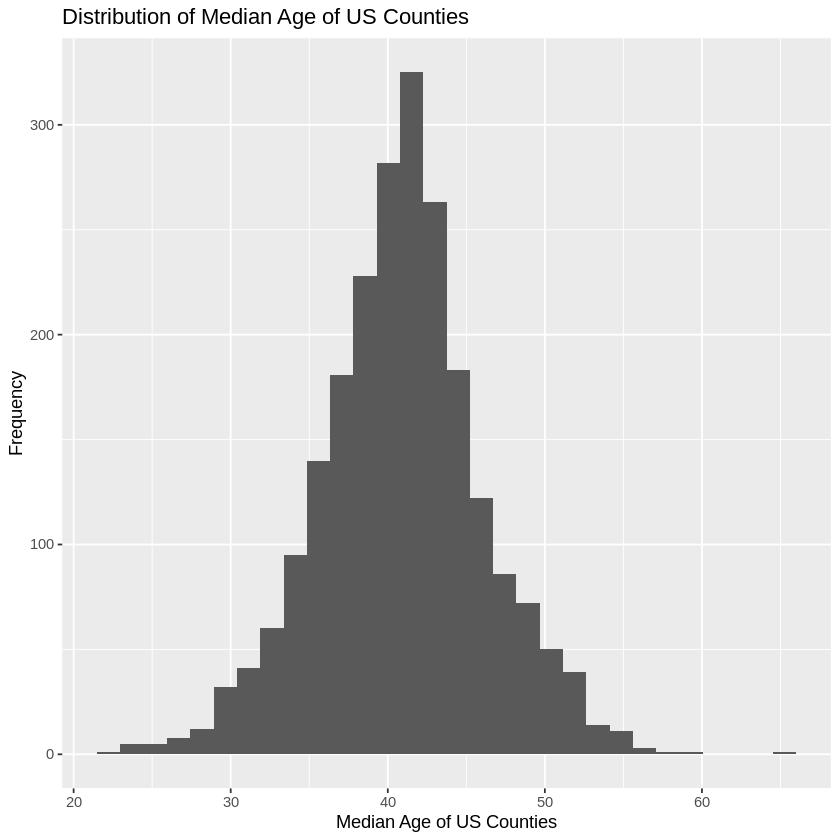

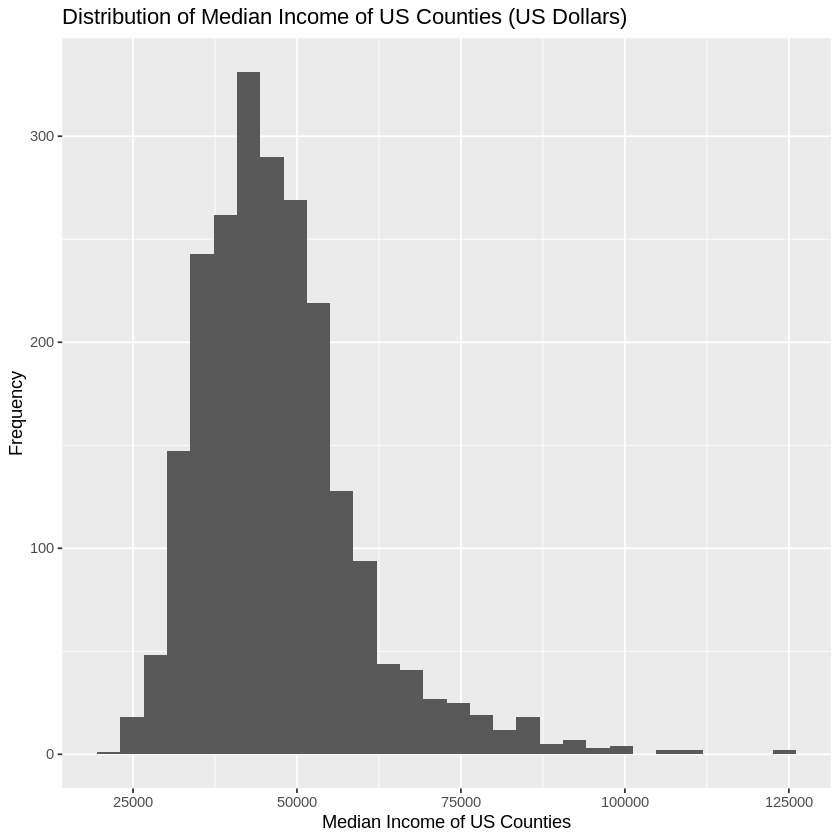

In [84]:
cancer_plot_age <- ggplot(cancer_training, aes(x = MedianAge)) +
    geom_histogram() +
    labs(x = "Median Age of US Counties", y = "Frequency") +
    ggtitle("Distribution of Median Age of US Counties")
cancer_plot_income <- ggplot(cancer_training, aes(x = MedianIncome)) +
    geom_histogram() +
    labs(x = "Median Income of US Counties", y = "Frequency") +
    ggtitle("Distribution of Median Income of US Counties (US Dollars)")
cancer_plot_age
cancer_plot_income

### Method:

To prepare our data for analysis, we started out with downloading the dataset from the web and publishing the data on our group GitHub. We then pulled the dataset and read it on Jupyter using a URL.

Then we decided to select and filter out the columns that are required for our analysis and decided to leave the rest out. We agreed to select the Median_Age and Median_Income columns as predictors in our research. We filtered our data to only contain observations of counties with median ages less than 100 to sieve out faulty and inaccurate data. We also removed cells that have missing data (NA). We also changed the column names to make it more human readable and easier to interpret.

The dataset required minimal cleaning as the data was in a relatively tidy format, and there wasn’t any metadata attached in the file nor was there any mismatch of rows and columns.

We are using median income/age to predict cancer mortality (average death per year). We hope to analyze our data using a regression model, specifically linear regression. However, if linear regression proves to be inappropriate for predicting the mortality rate, we will consider exploring the use of a KNN regression model.

### Expected Outcomes and Significance

We expect to find a positive correlation between the median age of counties and the cancer mortality rate (deaths per capita). We also expect that mortality rate increases with a decrease in median income.

We hope that our findings can affirm a greater need for healthcare access and support in geographic areas with lower-income and elderly populations. The results of this study could lead to other research questions investigating the trends between demographic data and other illnesses, such as heart disease, diabetes, and obesity. Our findings could also help in making decisions about distribution of healthcare infrastructure and facilities according to more vulnerable demographics.

### Sources cited
1) Siegel, R. L., Miller, K. D., Wagle, N. S., & Jemal, A. (2023). Cancer statistics, 2023. CA: A Cancer Journal for Clinicians, 73(1), 17–48. https://doi.org/10.3322/caac.21763 
2) Vaccarella, S., Georges, D., Bray, F., Ginsburg, O., Charvat, H., Martikainen, P., Brønnum-Hansen, H., Deboosere, P., Bopp, M., Leinsalu, M., Artnik, B., Lorenzoni, V., De Vries, E., Marmot, M., Vineis, P., Mackenbach, J., & Nusselder, W. (2023). Socioeconomic inequalities in cancer mortality between and within countries in Europe: A population-based study. The Lancet Regional Health - Europe, 25, 100551. https://doi.org/10.1016/j.lanepe.2022.100551 